In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier


## 1. Converting Minute Data into Second Data 

In [ ]:
def mean_10(row):
    add = 0
    lst=[]
    out=[]
    for i in row:
        lst.append(i)
        add+=i
        if len(lst)%10 == 0:
            mean= add/10
            out.append(mean)
            add=0
            lst=[]
    return out 

In [ ]:
def mean_100(row):
    add = 0
    lst=[]
    out=[]
    for i in row:
        lst.append(i)
        add+=i
        if len(lst)%100 == 0:
            mean= add/100
            out.append(mean)
            add=0
            lst=[]
    return out 

In [ ]:
data= pd.DataFrame()

In [ ]:
files=["CE","TS1","TS2","TS3","TS4","VS1","CP","FS1","FS2","EPS1","PS1","PS2","PS3","PS4","PS5","PS6","SE"]
add= "D:\ML\Hydrolic Data\{}.txt"
for i in files:
    obj=pd.read_csv(add.format(i), sep='\t', header=None)
    if len(obj.columns)==60:
        data[i]= obj.stack() 
    elif len(obj.columns)==600:
        data[i]= obj.stack()
        mean_10(data[i])
    elif len(obj.columns)==6000:
        data[i]= obj.stack()
        mean_100(data[i])
data.reset_index(drop= True)


In [ ]:
target= pd.read_csv("D:\ML\Hydrolic Data\profile.txt", sep="\t", names =["Cooler_Cond", "Valve_cond", "Int_Pump_Leak", "Hyd_Acc", "Stable_Flag"])

In [ ]:
target.head()

In [ ]:
def target_expand(dataframe):
   
    m = pd.DataFrame()    
    for col in dataframe.columns:
        temp_list  = []
        final_list = []
        for i in dataframe[col]:
            temp_list.append(i)
            temp_list= temp_list*60
            for j in temp_list:
                final_list.append(j)
                temp_list= []
        x = pd.DataFrame(final_list, columns= [col])
        m= pd.concat([m,x], axis=1)        
    
    return m

In [ ]:
out= target_expand(target)
out.shape

In [ ]:
data.shape

In [ ]:
ds_final= pd.concat([data.reset_index(drop=True), out.reset_index(drop=True)], axis=1)


In [ ]:
ds_final.to_csv("D:\ML\Hydrolic Data\Prepared CSV\Hydraulic Data per Sec.csv")

## 2. Data Analysis

In [4]:
data= pd.read_csv("D:\ML\Hydrolic Data\Prepared CSV\Hydraulic Data per Sec.csv", index_col= [0])

In [5]:
data.head()

,CE,TS1,TS2,TS3,TS4,VS1,CP,FS1,FS2,EPS1,...,PS3,PS4,PS5,PS6,SE,Cooler_Cond,Valve_cond,Int_Pump_Leak,Hyd_Acc,Stable_Flag
0,47.202,35.570,40.961,38.320,30.363,0.604,2.184,8.990,10.179,2411.6,...,2.305,0.0,9.936,9.818,68.039,3,100,0,130,1
1,47.273,35.492,40.949,38.332,30.375,0.605,2.184,0.770,10.174,2411.6,...,2.305,0.0,9.947,9.823,0.000,3,100,0,130,1
2,47.250,35.469,40.965,38.320,30.367,0.611,2.184,0.641,10.151,2411.6,...,2.336,0.0,9.964,9.844,0.000,3,100,0,130,1
3,47.332,35.422,40.922,38.324,30.367,0.603,2.185,0.006,10.149,2411.6,...,2.578,0.0,9.989,9.861,0.000,3,100,0,130,1
4,47.213,35.414,40.879,38.332,30.379,0.608,2.178,0.000,10.172,2411.6,...,2.977,0.0,9.996,9.877,0.000,3,100,0,130,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132300 entries, 0 to 132299
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CE             132300 non-null  float64
 1   TS1            132300 non-null  float64
 2   TS2            132300 non-null  float64
 3   TS3            132300 non-null  float64
 4   TS4            132300 non-null  float64
 5   VS1            132300 non-null  float64
 6   CP             132300 non-null  float64
 7   FS1            132300 non-null  float64
 8   FS2            132300 non-null  float64
 9   EPS1           132300 non-null  float64
 10  PS1            132300 non-null  float64
 11  PS2            132300 non-null  float64
 12  PS3            132300 non-null  float64
 13  PS4            132300 non-null  float64
 14  PS5            132300 non-null  float64
 15  PS6            132300 non-null  float64
 16  SE             132300 non-null  float64
 17  Cooler_Cond    132300 non-nul

In [7]:
data.corr()

,CE,TS1,TS2,TS3,TS4,VS1,CP,FS1,FS2,EPS1,...,PS3,PS4,PS5,PS6,SE,Cooler_Cond,Valve_cond,Int_Pump_Leak,Hyd_Acc,Stable_Flag
CE,1.000000,-0.945480,-0.945718,-0.940870,-0.955705,-0.636820,0.972298,-0.000575,0.918659,0.615873,...,0.028386,0.807099,0.971627,0.971746,0.100326,0.991498,-0.001462,-0.000381,-0.204507,-0.015309
TS1,-0.945480,1.000000,0.999189,0.999336,0.998950,0.678713,-0.908670,0.002811,-0.993706,-0.622806,...,-0.030274,-0.699701,-0.992213,-0.991960,-0.140644,-0.910590,-0.023868,0.019788,0.193538,-0.029012
TS2,-0.945718,0.999189,1.000000,0.998829,0.998140,0.672206,-0.905810,0.003099,-0.992590,-0.629016,...,-0.024974,-0.702430,-0.992718,-0.992505,-0.135829,-0.911677,-0.016847,0.003141,0.197003,-0.017203
TS3,-0.940870,0.999336,0.998829,1.000000,0.998315,0.685130,-0.899737,0.000907,-0.995626,-0.633401,...,-0.026656,-0.697854,-0.991242,-0.990965,-0.149874,-0.906325,-0.024682,0.022199,0.184094,-0.030505
TS4,-0.955705,0.998950,0.998140,0.998315,1.000000,0.682794,-0.923454,0.000908,-0.990651,-0.632568,...,-0.027252,-0.711113,-0.994585,-0.994348,-0.145083,-0.922540,-0.022593,0.021278,0.195237,-0.025853
VS1,-0.636820,0.678713,0.672206,0.685130,0.682794,1.000000,-0.609702,-0.006052,-0.688615,-0.540202,...,0.219850,-0.486909,-0.672288,-0.672026,-0.524054,-0.612682,-0.079036,0.117016,0.109517,-0.085818
CP,0.972298,-0.908670,-0.905810,-0.899737,-0.923454,-0.609702,1.000000,-0.000841,0.871806,0.572184,...,0.028432,0.743093,0.930203,0.930246,0.102600,0.952363,0.008571,-0.015742,-0.240458,-0.003218
FS1,-0.000575,0.002811,0.003099,0.000907,0.000908,-0.006052,-0.000841,1.000000,-0.001171,-0.077113,...,0.385199,-0.002016,-0.001237,-0.001195,0.010294,-0.000867,0.000700,-0.001309,-0.004052,0.000963
FS2,0.918659,-0.993706,-0.992590,-0.995626,-0.990651,-0.688615,0.871806,-0.001171,1.000000,0.625754,...,0.025755,0.683145,0.979599,0.979204,0.160974,0.881938,0.037830,-0.033266,-0.140244,0.054960
EPS1,0.615873,-0.622806,-0.629016,-0.633401,-0.632568,-0.540202,0.572184,-0.077113,0.625754,1.000000,...,-0.169928,0.485762,0.636624,0.636573,0.280451,0.608696,-0.013869,0.076235,-0.124179,-0.021255


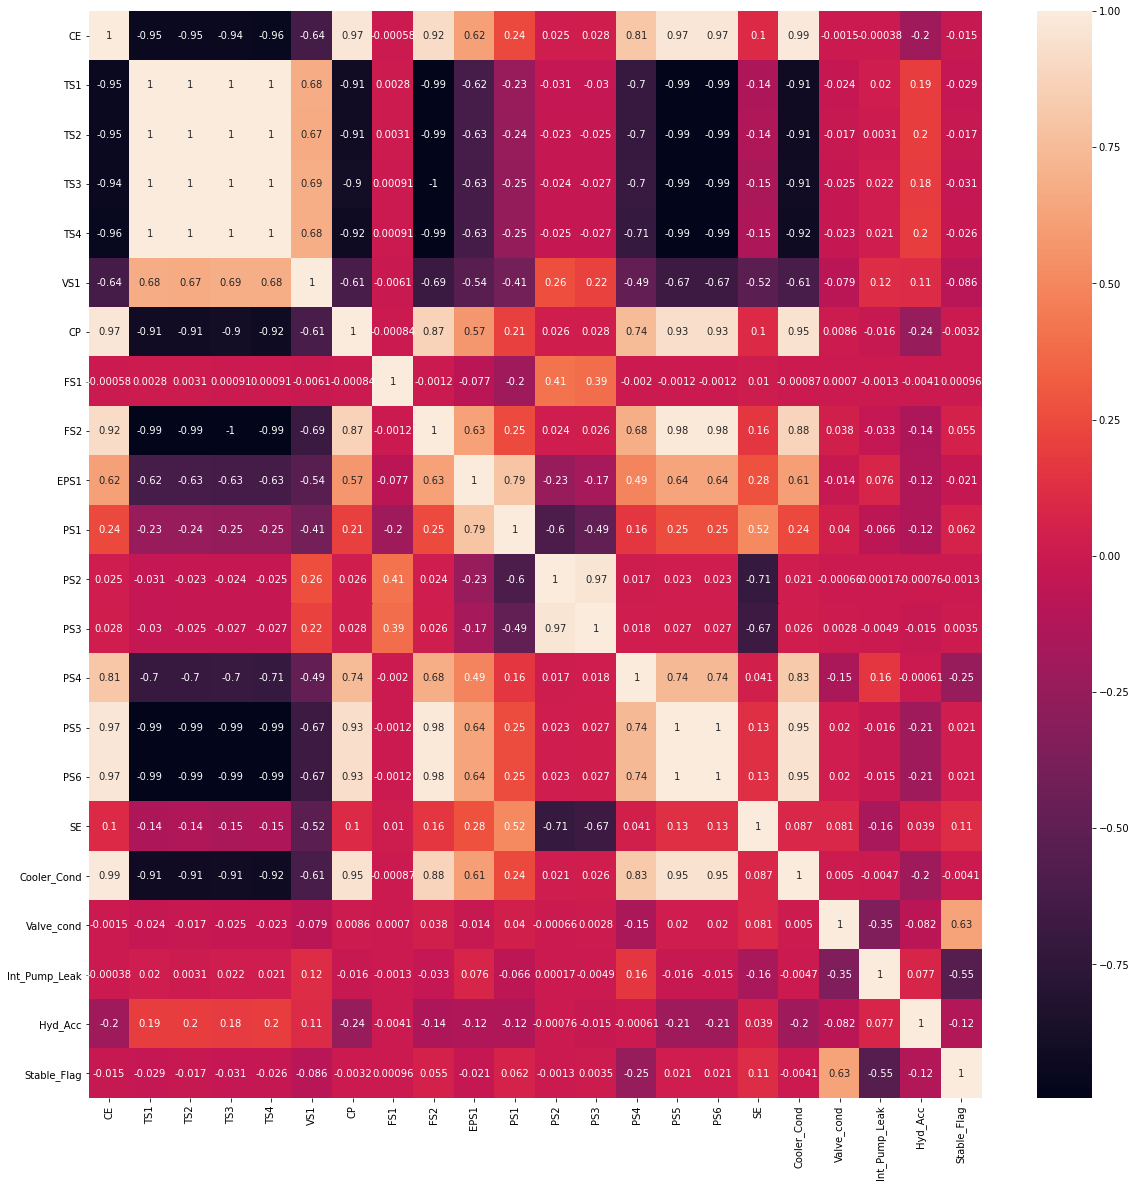

In [8]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True)
plt.show()

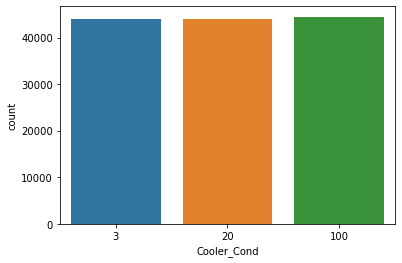

In [9]:
sns.countplot(data["Cooler_Cond"])
plt.show()

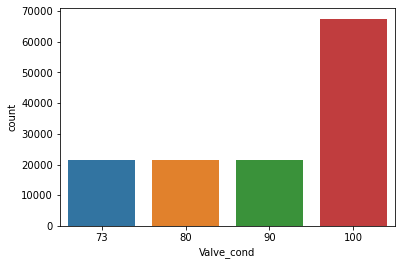

In [10]:
sns.countplot(data["Valve_cond"])
plt.show()

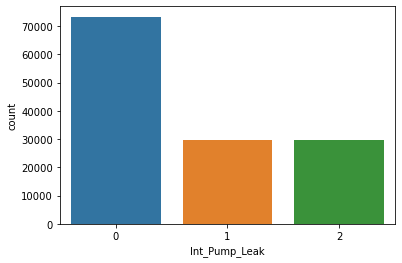

In [11]:
sns.countplot(data["Int_Pump_Leak"])
plt.show()

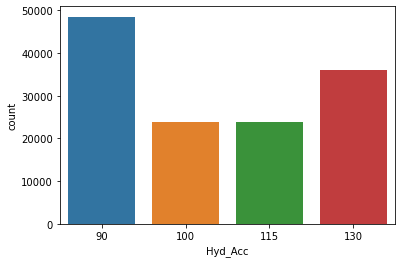

In [12]:
sns.countplot(data["Hyd_Acc"])
plt.show()

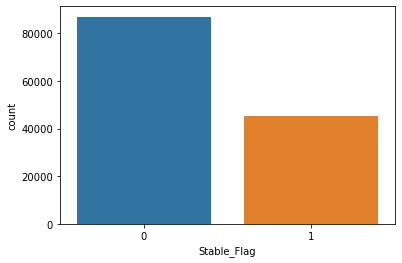

In [13]:
flag_plot= sns.countplot(data["Stable_Flag"])
plt.show()

# 4. Modeling & Predictions 

## 4.A. Cooler Conditon

### Data Preprocessing 

In [ ]:
X=data.iloc[:,:-5].values
y=data.iloc[:,-5].values

In [ ]:
# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling 

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1. K-Neighbor Classification

In [ ]:
clf_knc=KNeighborsClassifier(n_jobs=-1)
clf_knc.fit(X_train, y_train)

In [ ]:
y_pred= clf_knc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_knc,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [ ]:
precision_KNC = classification_report(y_test, y_pred, output_dict= True)["3"]["precision"]
print(precision_KNC)
accuracy_KNC =  accuracy_score(y_test, y_pred)
print(accuracy_KNC)

### Cross Validation

In [ ]:
scores=cross_validate(clf_knc,X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_knc_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_knc_cv)
precision_knc_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_knc_cv)

### 2.  XG Boost

In [ ]:
clf_xg = XGBClassifier(n_jobs= -1)
clf_xg.fit(X_train, y_train)

In [ ]:
y_pred = clf_xg.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_xg,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [ ]:
precision_XG = classification_report(y_test, y_pred, output_dict= True)["3"]["precision"]
print(precision_XG)
accuracy_XG =  accuracy_score(y_test, y_pred)
print(accuracy_XG)

### Cross Validation

In [ ]:
scores=cross_validate(clf_xg, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_xg_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_xg_cv)
precision_xg_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_xg_cv)

### 3. SVC 

In [ ]:
clf_svc = SVC(kernel= "rbf", random_state = 0)
clf_svc.fit(X_train, y_train)

In [ ]:
y_pred = clf_svc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_svc,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [ ]:
precision_SVC = classification_report(y_test, y_pred, output_dict= True)["3"]["precision"]
print(precision_SVC)
accuracy_SVC =  accuracy_score(y_test, y_pred)
print(accuracy_SVC)

### Cross Validation

In [ ]:
scores=cross_validate(clf_svc, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_svc_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_svc_cv)
precision_svc_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_svc_cv)

### 4. Decision Tree

In [ ]:
clf_DT= DecisionTreeClassifier(criterion="entropy", random_state=0)
clf_DT.fit(X_train, y_train)

In [ ]:
y_pred= clf_DT.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_DT,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [ ]:
precision_DT = classification_report(y_test, y_pred, output_dict= True)["3"]["precision"]
print(precision_DT)
accuracy_DT =  accuracy_score(y_test, y_pred)
print(accuracy_DT)

### Cross Validation

In [ ]:
scores=cross_validate(clf_DT, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
scores=cross_validate(clf_DT, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_DT_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_DT_cv)
precision_DT_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_DT_cv)

### 5. Random Forest

In [ ]:
clf_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
clf_RF.fit(X_train, y_train)

In [ ]:
y_pred = clf_RF.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_RF,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [ ]:
precision_RF = classification_report(y_test, y_pred, output_dict= True)["3"]["precision"]
print(precision_RF)
accuracy_RF =  accuracy_score(y_test, y_pred)
print(accuracy_RF)

### Cross Validation

In [ ]:
scores=cross_validate(clf_RF, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_RF_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_RF_cv)
precision_RF_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_RF_cv)

In [ ]:
Final_accuracy=[accuracy_KNC ,accuracy_XG, accuracy_SVC, accuracy_DT,accuracy_RF]
Final_precision=[precision_KNC,precision_XG,precision_SVC,precision_DT,precision_RF]

In [ ]:
report_accuracy = pd.DataFrame(Final_accuracy, columns=["Accuracy"])
report_precision= pd.DataFrame(Final_precision, columns=["Precision"])

In [ ]:
report = pd.concat([report_accuracy,report_precision], axis=1)
report.set_axis(["KNN", "XG Boost", "SVC", "Decision Tree", "Random Forest"])

In [ ]:
print("Best Accuracy for Cooler Condition by Decision Tree: ", max(report.Accuracy))

## 4.B. Cooler Conditon

### Data Preprocessing 

In [3]:
X=data.iloc[:,:-5].values
y=data.iloc[:,-4].values

In [4]:
# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling 

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1. K-Neighbor Classification

In [19]:
clf_knc=KNeighborsClassifier(n_jobs=-1)
clf_knc.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [20]:
y_pred= clf_knc.predict(X_test)

[[ 3375   855   503   613]
 [ 1155  2786   755   692]
 [  768  1046  2617  1018]
 [  915  1044  1266 13667]]


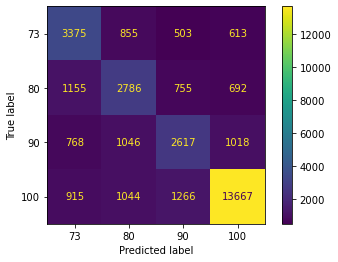

{'73': {'precision': 0.5432158377595364, 'recall': 0.6313131313131313, 'f1-score': 0.5839605502206072, 'support': 5346}, '80': {'precision': 0.4861280753795149, 'recall': 0.5170749814402376, 'f1-score': 0.5011242018167101, 'support': 5388}, '90': {'precision': 0.5090449328924334, 'recall': 0.48027160946962744, 'f1-score': 0.49423984891406986, 'support': 5449}, '100': {'precision': 0.8547217010631645, 'recall': 0.80908122188018, 'f1-score': 0.8312754698619305, 'support': 16892}, 'accuracy': 0.6786092214663644, 'macro avg': {'precision': 0.5982776367736623, 'recall': 0.6094352360257941, 'f1-score': 0.6026500177033294, 'support': 33075}, 'weighted avg': {'precision': 0.6873782238094377, 'recall': 0.6786092214663644, 'f1-score': 0.6819933023282931, 'support': 33075}}


In [21]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_knc,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [22]:
precision_KNC = classification_report(y_test, y_pred, output_dict= True)["73"]["precision"]
print(precision_KNC)
accuracy_KNC =  accuracy_score(y_test, y_pred)
print(accuracy_KNC)

0.5432158377595364
0.6786092214663644


### Cross Validation

In [ ]:
scores=cross_validate(clf_knc,X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_knc_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_knc_cv)
precision_knc_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_knc_cv)

### 2.  XG Boost

In [23]:
clf_xg = XGBClassifier(n_jobs= -1)
clf_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
y_pred = clf_xg.predict(X_test)

[[ 4154   486   181   525]
 [  504  3883   537   464]
 [  252   545  3638  1014]
 [  319   299   502 15772]]


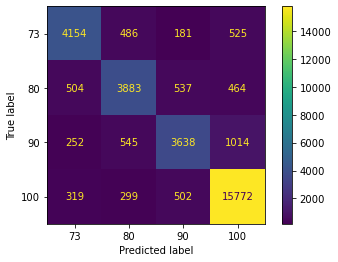

{'73': {'precision': 0.7944157582711799, 'recall': 0.7770295548073326, 'f1-score': 0.785626477541371, 'support': 5346}, '80': {'precision': 0.7448685977364281, 'recall': 0.7206755753526355, 'f1-score': 0.732572398830299, 'support': 5388}, '90': {'precision': 0.7488678468505557, 'recall': 0.6676454395301891, 'f1-score': 0.70592801009023, 'support': 5449}, '100': {'precision': 0.8873136427566807, 'recall': 0.9336964243428842, 'f1-score': 0.9099143277468486, 'support': 16892}, 'accuracy': 0.8298412698412698, 'macro avg': {'precision': 0.7938664614037111, 'recall': 0.7747617485082603, 'f1-score': 0.7835103035521871, 'support': 33075}, 'weighted avg': {'precision': 0.8262851579518105, 'recall': 0.8298412698412698, 'f1-score': 0.8273298196557898, 'support': 33075}}


In [25]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_xg,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [26]:
precision_XG = classification_report(y_test, y_pred, output_dict= True)["73"]["precision"]
print(precision_XG)
accuracy_XG =  accuracy_score(y_test, y_pred)
print(accuracy_XG)

0.7944157582711799
0.8298412698412698


### Cross Validation

In [ ]:
scores=cross_validate(clf_xg, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_xg_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_xg_cv)
precision_xg_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_xg_cv)

### 3. SVC 

In [6]:
clf_svc = SVC(kernel= "rbf", random_state = 0, cache_size=7000)
clf_svc.fit(X_train, y_train)

SVC(cache_size=7000, random_state=0)

In [7]:
y_pred = clf_svc.predict(X_test)

[[  322     8    29  4987]
 [   97    50    15  5226]
 [   59     9    45  5336]
 [   48     1     4 16839]]


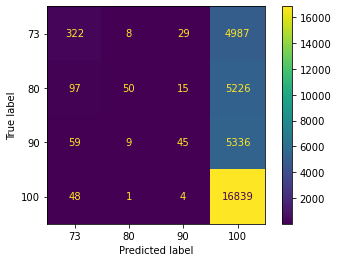

{'73': {'precision': 0.6121673003802282, 'recall': 0.06023194912083801, 'f1-score': 0.10967302452316077, 'support': 5346}, '80': {'precision': 0.7352941176470589, 'recall': 0.009279881217520415, 'f1-score': 0.018328445747800584, 'support': 5388}, '90': {'precision': 0.4838709677419355, 'recall': 0.008258396035969904, 'f1-score': 0.01623962468422952, 'support': 5449}, '100': {'precision': 0.5199147832530567, 'recall': 0.9968624200805115, 'f1-score': 0.6834009740259741, 'support': 16892}, 'accuracy': 0.5217233560090703, 'macro avg': {'precision': 0.5878117922555698, 'recall': 0.26865816161371, 'f1-score': 0.20691051724529125, 'support': 33075}, 'weighted avg': {'precision': 0.5639735303295993, 'recall': 0.5217233560090703, 'f1-score': 0.3724131405273194, 'support': 33075}}


In [8]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_svc,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [9]:
precision_SVC = classification_report(y_test, y_pred, output_dict= True)["73"]["precision"]
print(precision_SVC)
accuracy_SVC =  accuracy_score(y_test, y_pred)
print(accuracy_SVC)

0.6121673003802282
0.5217233560090703


### Cross Validation

In [ ]:
scores=cross_validate(clf_svc, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_svc_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_svc_cv)
precision_svc_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_svc_cv)

### 4. Decision Tree

In [10]:
clf_DT= DecisionTreeClassifier(criterion="entropy", random_state=0)
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
y_pred= clf_DT.predict(X_test)

[[ 4259   487   244   356]
 [  490  4056   566   276]
 [  227   513  4038   671]
 [  302   288   705 15597]]


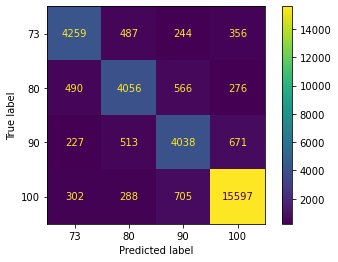

{'73': {'precision': 0.8069344448654794, 'recall': 0.7966704077815189, 'f1-score': 0.801769578313253, 'support': 5346}, '80': {'precision': 0.7589820359281437, 'recall': 0.7527839643652561, 'f1-score': 0.7558702944465151, 'support': 5388}, '90': {'precision': 0.7271745002701242, 'recall': 0.741053404294366, 'f1-score': 0.7340483548445736, 'support': 5449}, '100': {'precision': 0.9228994082840236, 'recall': 0.9233364906464598, 'f1-score': 0.9231178977272727, 'support': 16892}, 'accuracy': 0.8450491307634165, 'macro avg': {'precision': 0.8039975973369428, 'recall': 0.8034610667719002, 'f1-score': 0.8037015313329037, 'support': 33075}, 'weighted avg': {'precision': 0.8452080849142048, 'recall': 0.8450491307634165, 'f1-score': 0.8451103953468675, 'support': 33075}}


In [12]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_DT,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [13]:
precision_DT = classification_report(y_test, y_pred, output_dict= True)["73"]["precision"]
print(precision_DT)
accuracy_DT =  accuracy_score(y_test, y_pred)
print(accuracy_DT)

0.8069344448654794
0.8450491307634165


### Cross Validation

In [ ]:
scores=cross_validate(clf_DT, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
scores=cross_validate(clf_DT, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_DT_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_DT_cv)
precision_DT_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_DT_cv)

### 5. Random Forest

In [14]:
clf_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [15]:
y_pred = clf_RF.predict(X_test)

[[ 4788   288    95   175]
 [  335  4595   313   145]
 [  108   376  4488   477]
 [  148   174   362 16208]]


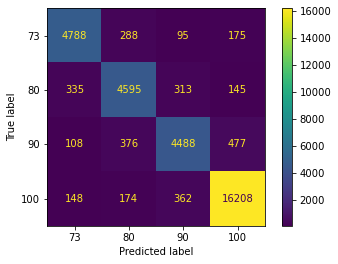

{'73': {'precision': 0.8901282766313441, 'recall': 0.8956228956228957, 'f1-score': 0.8928671328671329, 'support': 5346}, '80': {'precision': 0.845757408429965, 'recall': 0.8528210838901262, 'f1-score': 0.8492745587283985, 'support': 5388}, '90': {'precision': 0.8535564853556485, 'recall': 0.823637364654065, 'f1-score': 0.8383300644438217, 'support': 5449}, '100': {'precision': 0.9531314319317847, 'recall': 0.9595074591522614, 'f1-score': 0.9563088178894887, 'support': 16892}, 'accuracy': 0.9094179894179895, 'macro avg': {'precision': 0.8856434005871856, 'recall': 0.882897200829837, 'f1-score': 0.8841951434822104, 'support': 33075}, 'weighted avg': {'precision': 0.9090519159602858, 'recall': 0.9094179894179895, 'f1-score': 0.9091818015927418, 'support': 33075}}


In [16]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_RF,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [17]:
precision_RF = classification_report(y_test, y_pred, output_dict= True)["73"]["precision"]
print(precision_RF)
accuracy_RF =  accuracy_score(y_test, y_pred)
print(accuracy_RF)

0.8901282766313441
0.9094179894179895


### Cross Validation

In [ ]:
scores=cross_validate(clf_RF, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_RF_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_RF_cv)
precision_RF_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_RF_cv)

In [27]:
Final_accuracy=[accuracy_KNC ,accuracy_XG, accuracy_SVC, accuracy_DT,accuracy_RF]
Final_precision=[precision_KNC,precision_XG,precision_SVC,precision_DT,precision_RF]

In [28]:
report_accuracy = pd.DataFrame(Final_accuracy, columns=["Accuracy"])
report_precision= pd.DataFrame(Final_precision, columns=["Precision"])

In [29]:
report = pd.concat([report_accuracy,report_precision], axis=1)
report.set_axis(["KNN", "XG Boost", "SVC", "Decision Tree", "Random Forest"])

,Accuracy,Precision
KNN,0.678609,0.543216
XG Boost,0.829841,0.794416
SVC,0.521723,0.612167
Decision Tree,0.845049,0.806934
Random Forest,0.909418,0.890128


In [31]:
print("Best Accuracy for Valve Condition by Random Forest ", max(report.Accuracy))

Best Accuracy for Valve Condition by Random Forest  0.9094179894179895


## 4.C. Internal Pump Leakage

### Data Preprocessing 

In [32]:
X=data.iloc[:,:-5].values
y=data.iloc[:,-3].values

In [33]:
# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling 

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1. K-Neighbor Classification

In [35]:
clf_knc=KNeighborsClassifier(n_jobs=-1)
clf_knc.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [36]:
y_pred= clf_knc.predict(X_test)

[[18148   253    28]
 [  253  6512   616]
 [  118   692  6455]]


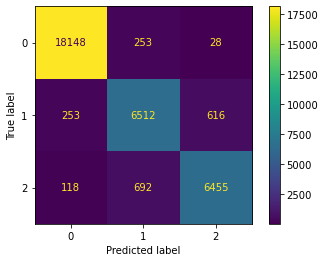

{'0': {'precision': 0.9799665208704573, 'recall': 0.9847522925823431, 'f1-score': 0.9823535780015157, 'support': 18429}, '1': {'precision': 0.87327343435698, 'recall': 0.8822652757078987, 'f1-score': 0.8777463269982477, 'support': 7381}, '2': {'precision': 0.9092829976052965, 'recall': 0.8885065381968341, 'f1-score': 0.8987747145641883, 'support': 7265}, 'accuracy': 0.9407407407407408, 'macro avg': {'precision': 0.9208409842775781, 'recall': 0.9185080354956919, 'f1-score': 0.9196248731879839, 'support': 33075}, 'weighted avg': {'precision': 0.9406311476859565, 'recall': 0.9407407407407408, 'f1-score': 0.9406511876000855, 'support': 33075}}


In [37]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_knc,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [39]:
precision_KNC = classification_report(y_test, y_pred, output_dict= True)["2"]["precision"]
print(precision_KNC)
accuracy_KNC =  accuracy_score(y_test, y_pred)
print(accuracy_KNC)

0.9092829976052965
0.9407407407407408


### Cross Validation

In [40]:
scores=cross_validate(clf_knc,X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.83177447, 0.82179976, 0.8666482 , 0.82581949, 0.77991772,
        0.92053437, 0.83077908, 0.86069798, 0.85670972, 0.86069751]),
 'score_time': array([2.49129105, 1.30398417, 1.2498188 , 1.22177291, 1.26001835,
        1.27514458, 1.50103211, 1.42074847, 1.37842679, 1.24543667]),
 'test_accuracy': array([0.93933286, 0.94054217, 0.94013907, 0.93711579, 0.94054217,
        0.93962911, 0.94083854, 0.93801653, 0.93670631, 0.93841967]),
 'test_precision_weighted': array([0.9391951 , 0.94036527, 0.93972165, 0.93684314, 0.94031735,
        0.93964412, 0.94059732, 0.93795859, 0.93637275, 0.93834786])}

In [41]:
accuracy_knc_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_knc_cv)
precision_knc_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_knc_cv)

Accuracy Score is 0.9391282234219412
Precision Score is 0.938936314071011


### 2.  XG Boost

In [42]:
clf_xg = XGBClassifier(n_jobs= -1)
clf_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred = clf_xg.predict(X_test)

[[18387    37     5]
 [   22  7286    73]
 [   41    36  7188]]


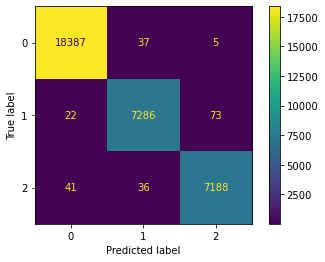

{'0': {'precision': 0.9965853658536585, 'recall': 0.9977209832329481, 'f1-score': 0.9971528512161393, 'support': 18429}, '1': {'precision': 0.9900801739366761, 'recall': 0.9871291152960303, 'f1-score': 0.9886024423337856, 'support': 7381}, '2': {'precision': 0.9892650701899257, 'recall': 0.9894012388162423, 'f1-score': 0.9893331498176313, 'support': 7265}, 'accuracy': 0.9935298563869992, 'macro avg': {'precision': 0.99197686999342, 'recall': 0.9914171124484069, 'f1-score': 0.9916961477891855, 'support': 33075}, 'weighted avg': {'precision': 0.9935257507505213, 'recall': 0.9935298563869992, 'f1-score': 0.9935271309252605, 'support': 33075}}


In [44]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_xg,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [46]:
precision_XG = classification_report(y_test, y_pred, output_dict= True)["2"]["precision"]
print(precision_XG)
accuracy_XG =  accuracy_score(y_test, y_pred)
print(accuracy_XG)

0.9892650701899257
0.9935298563869992


### Cross Validation

In [47]:
scores=cross_validate(clf_xg, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([11.61494613, 12.75988674, 12.08269787, 12.35098028, 12.12458563,
        13.04213071, 13.25556087, 11.43742228, 12.03083611, 11.76654291]),
 'score_time': array([0.06682086, 0.07180858, 0.07080984, 0.07878923, 0.06981397,
        0.07679439, 0.06183457, 0.06582355, 0.06382918, 0.06482601]),
 'test_accuracy': array([0.9924418 , 0.99486043, 0.99445732, 0.99264335, 0.99344956,
        0.99496069, 0.99284418, 0.99284418, 0.99395283, 0.9927434 ]),
 'test_precision_weighted': array([0.99243254, 0.99485463, 0.99445355, 0.99263514, 0.99345201,
        0.99495686, 0.99285509, 0.9928465 , 0.993964  , 0.9927383 ])}

In [48]:
accuracy_xg_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_xg_cv)
precision_xg_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_xg_cv)

Accuracy Score is 0.9935197757260232
Precision Score is 0.9935188627824333


### 3. SVC 

In [49]:
clf_svc = SVC(kernel= "rbf", random_state = 0, cache_size= 7000)
clf_svc.fit(X_train, y_train)

SVC(cache_size=7000, random_state=0)

In [50]:
y_pred = clf_svc.predict(X_test)

[[17543   774   112]
 [ 1626  4232  1523]
 [  477  1397  5391]]


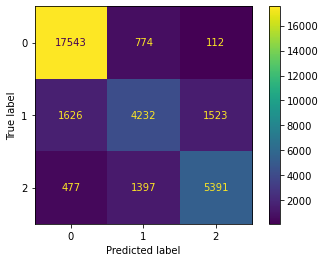

{'0': {'precision': 0.8929553089687469, 'recall': 0.9519235986759997, 'f1-score': 0.9214970453053185, 'support': 18429}, '1': {'precision': 0.6609401842886147, 'recall': 0.573364042812627, 'f1-score': 0.6140452698781195, 'support': 7381}, '2': {'precision': 0.7672929120409906, 'recall': 0.7420509291121817, 'f1-score': 0.7544608494856903, 'support': 7265}, 'accuracy': 0.8213454270597128, 'macro avg': {'precision': 0.773729468432784, 'recall': 0.7557795235336028, 'f1-score': 0.7633343882230427, 'support': 33075}, 'weighted avg': {'precision': 0.8135768978139711, 'recall': 0.8213454270597128, 'f1-score': 0.816196379634638, 'support': 33075}}


In [51]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_svc,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [52]:
precision_SVC = classification_report(y_test, y_pred, output_dict= True)["2"]["precision"]
print(precision_SVC)
accuracy_SVC =  accuracy_score(y_test, y_pred)
print(accuracy_SVC)

0.7672929120409906
0.8213454270597128


### Cross Validation

In [ ]:
scores=cross_validate(clf_svc, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_svc_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_svc_cv)
precision_svc_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_svc_cv)

### 4. Decision Tree

In [53]:
clf_DT= DecisionTreeClassifier(criterion="entropy", random_state=0)
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
y_pred= clf_DT.predict(X_test)

[[18312    87    30]
 [   68  7197   116]
 [   37   105  7123]]


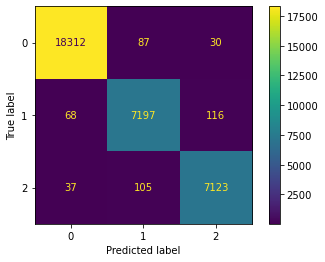

{'0': {'precision': 0.9942987457240593, 'recall': 0.993651310434641, 'f1-score': 0.993974922651034, 'support': 18429}, '1': {'precision': 0.9740154283394235, 'recall': 0.9750711285733641, 'f1-score': 0.9745429925524712, 'support': 7381}, '2': {'precision': 0.9799147062869721, 'recall': 0.980454232622161, 'f1-score': 0.9801843952112289, 'support': 7265}, 'accuracy': 0.9866061980347695, 'macro avg': {'precision': 0.9827429601168182, 'recall': 0.9830588905433887, 'f1-score': 0.9829007701382447, 'support': 33075}, 'weighted avg': {'precision': 0.9866128436189516, 'recall': 0.9866061980347695, 'f1-score': 0.9866093819735532, 'support': 33075}}


In [55]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_DT,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [56]:
precision_DT = classification_report(y_test, y_pred, output_dict= True)["2"]["precision"]
print(precision_DT)
accuracy_DT =  accuracy_score(y_test, y_pred)
print(accuracy_DT)

0.9799147062869721
0.9866061980347695


### Cross Validation

In [ ]:
scores=cross_validate(clf_DT, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
scores=cross_validate(clf_DT, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_DT_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_DT_cv)
precision_DT_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_DT_cv)

### 5. Random Forest

In [57]:
clf_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [58]:
y_pred = clf_RF.predict(X_test)

[[18387    37     5]
 [   29  7288    64]
 [   52    28  7185]]


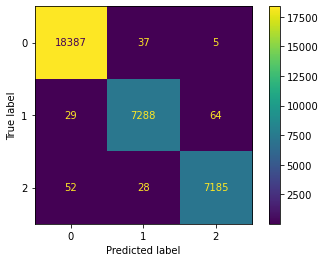

{'0': {'precision': 0.9956140350877193, 'recall': 0.9977209832329481, 'f1-score': 0.9966663956419222, 'support': 18429}, '1': {'precision': 0.9911600707194342, 'recall': 0.9874000812897982, 'f1-score': 0.9892765033256413, 'support': 7381}, '2': {'precision': 0.9904880066170388, 'recall': 0.9889883000688231, 'f1-score': 0.9897375852331427, 'support': 7265}, 'accuracy': 0.9934996220710507, 'macro avg': {'precision': 0.9924207041413974, 'recall': 0.9913697881971898, 'f1-score': 0.9918934947335688, 'support': 33075}, 'weighted avg': {'precision': 0.9934941467175968, 'recall': 0.9934996220710507, 'f1-score': 0.9934953418911662, 'support': 33075}}


In [59]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_RF,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [60]:
precision_RF = classification_report(y_test, y_pred, output_dict= True)["2"]["precision"]
print(precision_RF)
accuracy_RF =  accuracy_score(y_test, y_pred)
print(accuracy_RF)

0.9904880066170388
0.9934996220710507


### Cross Validation

In [ ]:
scores=cross_validate(clf_RF, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_RF_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_RF_cv)
precision_RF_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_RF_cv)

In [61]:
Final_accuracy=[accuracy_KNC ,accuracy_XG, accuracy_SVC, accuracy_DT,accuracy_RF]
Final_precision=[precision_KNC,precision_XG,precision_SVC,precision_DT,precision_RF]

In [62]:
report_accuracy = pd.DataFrame(Final_accuracy, columns=["Accuracy"])
report_precision= pd.DataFrame(Final_precision, columns=["Precision"])

In [63]:
report = pd.concat([report_accuracy,report_precision], axis=1)
report.set_axis(["KNN", "XG Boost", "SVC", "Decision Tree", "Random Forest"])

,Accuracy,Precision
KNN,0.940741,0.909283
XG Boost,0.993530,0.989265
SVC,0.821345,0.767293
Decision Tree,0.986606,0.979915
Random Forest,0.993500,0.990488


In [65]:
print("Best Accuracy for Internal Pump Leakage by Random Forest ", max(report.Accuracy))

Best Accuracy for Internal Pump Leakage by Random Forest  0.9935298563869992


## 4.D. Hydraulic Accumelator

### Data Preprocessing 

In [66]:
X=data.iloc[:,:-5].values
y=data.iloc[:,-2].values

In [67]:
# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling 

In [68]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1. K-Neighbor Classification

In [69]:
clf_knc=KNeighborsClassifier(n_jobs=-1)
clf_knc.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [70]:
y_pred= clf_knc.predict(X_test)

[[11302   582   145    58]
 [  540  4992   414    47]
 [  171   489  5033   237]
 [  209   113   124  8619]]


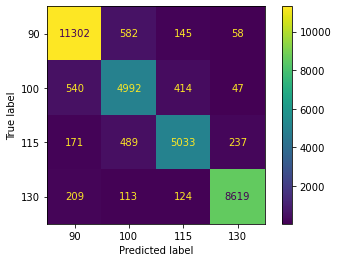

{'90': {'precision': 0.9247259041073475, 'recall': 0.9350541904525523, 'f1-score': 0.9298613682175326, 'support': 12087}, '100': {'precision': 0.8082901554404145, 'recall': 0.8329718004338394, 'f1-score': 0.8204453940340207, 'support': 5993}, '115': {'precision': 0.8805108467459762, 'recall': 0.848735244519393, 'f1-score': 0.8643311008071441, 'support': 5930}, '130': {'precision': 0.9618346166722465, 'recall': 0.950799779371208, 'f1-score': 0.9562853655830467, 'support': 9065}, 'accuracy': 0.9053968253968254, 'macro avg': {'precision': 0.8938403807414961, 'recall': 0.8918902536942482, 'f1-score': 0.8927308071604361, 'support': 33075}, 'weighted avg': {'precision': 0.9058716561099763, 'recall': 0.9053968253968254, 'f1-score': 0.9055290663911681, 'support': 33075}}


In [71]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_knc,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [72]:
precision_KNC = classification_report(y_test, y_pred, output_dict= True)["90"]["precision"]
print(precision_KNC)
accuracy_KNC =  accuracy_score(y_test, y_pred)
print(accuracy_KNC)

0.9247259041073475
0.9053968253968254


### Cross Validation

In [73]:
scores=cross_validate(clf_knc,X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.83380246, 0.79985952, 0.83875728, 0.81382179, 0.82576442,
        0.82579207, 0.81883669, 0.84476852, 0.8686769 , 0.81582046]),
 'score_time': array([2.41485429, 1.18604612, 1.20550179, 1.24181652, 1.21433353,
        1.24639988, 1.45795131, 1.24397302, 1.20031762, 1.23935533]),
 'test_accuracy': array([0.89831704, 0.90214653, 0.90335584, 0.90244886, 0.90113877,
        0.90223745, 0.8997178 , 0.90253981, 0.89840758, 0.9011288 ]),
 'test_precision_weighted': array([0.89847484, 0.9025392 , 0.90369301, 0.90291373, 0.90170955,
        0.90276424, 0.90057703, 0.90310422, 0.89932502, 0.90178271])}

In [74]:
accuracy_knc_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_knc_cv)
precision_knc_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_knc_cv)

Accuracy Score is 0.9011438479436187
Precision Score is 0.9016883551063357


### 2.  XG Boost

In [75]:
clf_xg = XGBClassifier(n_jobs= -1)
clf_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
y_pred = clf_xg.predict(X_test)

[[11826   196    37    28]
 [   76  5668   234    15]
 [   16   188  5681    45]
 [   32    16    49  8968]]


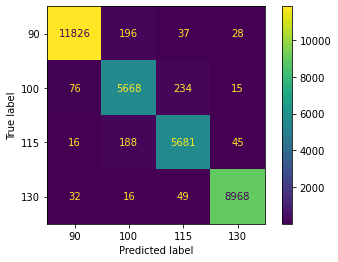

{'90': {'precision': 0.9896234309623431, 'recall': 0.9784065524944154, 'f1-score': 0.983983026167991, 'support': 12087}, '100': {'precision': 0.9340804218852999, 'recall': 0.9457700650759219, 'f1-score': 0.9398888981013183, 'support': 5993}, '115': {'precision': 0.9466755540743209, 'recall': 0.9580101180438448, 'f1-score': 0.9523091107199732, 'support': 5930}, '130': {'precision': 0.9902826855123675, 'recall': 0.9892995035852179, 'f1-score': 0.9897908503945699, 'support': 9065}, 'accuracy': 0.9718216175359032, 'macro avg': {'precision': 0.9651655231085828, 'recall': 0.96787155979985, 'f1-score': 0.9664929713459631, 'support': 33075}, 'weighted avg': {'precision': 0.9720399382685042, 'recall': 0.9718216175359032, 'f1-score': 0.9719063972489774, 'support': 33075}}


In [77]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_xg,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [78]:
precision_XG = classification_report(y_test, y_pred, output_dict= True)["90"]["precision"]
print(precision_XG)
accuracy_XG =  accuracy_score(y_test, y_pred)
print(accuracy_XG)

0.9896234309623431
0.9718216175359032


### Cross Validation

In [79]:
scores=cross_validate(clf_xg, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([14.84627509, 14.83434105, 15.14451146, 14.84830189, 14.90913987,
        15.08068252, 14.85727978, 14.91213274, 15.07569551, 14.84132218]),
 'score_time': array([0.088763  , 0.08676767, 0.08577108, 0.08876204, 0.08776593,
        0.08676815, 0.09574366, 0.08876276, 0.09075713, 0.08975959]),
 'test_accuracy': array([0.97329437, 0.97178273, 0.97178273, 0.97127885, 0.9710773 ,
        0.97288853, 0.97278774, 0.97157831, 0.96905866, 0.97248539]),
 'test_precision_weighted': array([0.97360174, 0.97204619, 0.97200097, 0.97158446, 0.97133545,
        0.97307985, 0.9729982 , 0.97174794, 0.96961508, 0.97276952])}

In [80]:
accuracy_xg_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_xg_cv)
precision_xg_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_xg_cv)

Accuracy Score is 0.9718014592223048
Precision Score is 0.9720779403653819


### 3. SVC 

In [81]:
clf_svc = SVC(kernel= "rbf", random_state = 0)
clf_svc.fit(X_train, y_train)

SVC(random_state=0)

In [82]:
y_pred = clf_svc.predict(X_test)

[[10548  1005   180   354]
 [ 1028  4192   748    25]
 [ 1026   660  3908   336]
 [  838   247   126  7854]]


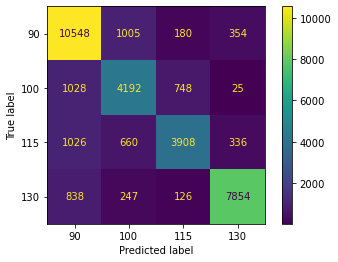

{'90': {'precision': 0.7848214285714286, 'recall': 0.8726731198808637, 'f1-score': 0.8264190856739921, 'support': 12087}, '100': {'precision': 0.6867627785058977, 'recall': 0.6994827298514934, 'f1-score': 0.6930643961312722, 'support': 5993}, '115': {'precision': 0.7875856509471987, 'recall': 0.6590219224283306, 'f1-score': 0.7175908923980903, 'support': 5930}, '130': {'precision': 0.9165596919127086, 'recall': 0.8664092664092664, 'f1-score': 0.8907791765906771, 'support': 9065}, 'accuracy': 0.8012698412698412, 'macro avg': {'precision': 0.7939323874843085, 'recall': 0.7743967596424886, 'f1-score': 0.7819633876985078, 'support': 33075}, 'weighted avg': {'precision': 0.8036554030547028, 'recall': 0.8012698412698412, 'f1-score': 0.800383662653709, 'support': 33075}}


In [83]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_svc,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [84]:
precision_SVC = classification_report(y_test, y_pred, output_dict= True)["90"]["precision"]
print(precision_SVC)
accuracy_SVC =  accuracy_score(y_test, y_pred)
print(accuracy_SVC)

0.7848214285714286
0.8012698412698412


### Cross Validation

In [ ]:
scores=cross_validate(clf_svc, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_svc_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_svc_cv)
precision_svc_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_svc_cv)

### 4. Decision Tree

In [85]:
clf_DT= DecisionTreeClassifier(criterion="entropy", random_state=0)
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [86]:
y_pred= clf_DT.predict(X_test)

[[11666   258    78    85]
 [  256  5279   412    46]
 [   87   380  5372    91]
 [   90    50    71  8854]]


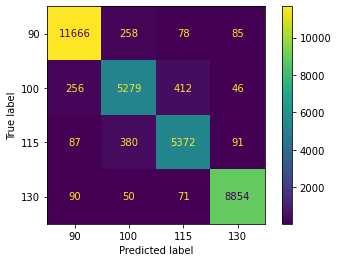

{'90': {'precision': 0.9642119183403587, 'recall': 0.9651691900388848, 'f1-score': 0.9646903167121476, 'support': 12087}, '100': {'precision': 0.8846991788168259, 'recall': 0.8808610045052562, 'f1-score': 0.8827759197324415, 'support': 5993}, '115': {'precision': 0.9054441260744985, 'recall': 0.9059021922428331, 'f1-score': 0.9056731012391469, 'support': 5930}, '130': {'precision': 0.9755398854120758, 'recall': 0.9767236624379482, 'f1-score': 0.9761314150267351, 'support': 9065}, 'accuracy': 0.9424338624338624, 'macro avg': {'precision': 0.9324737771609397, 'recall': 0.9321640123062306, 'f1-score': 0.9323176881776178, 'support': 33075}, 'weighted avg': {'precision': 0.9423729210736628, 'recall': 0.9424338624338624, 'f1-score': 0.9424024402909069, 'support': 33075}}


In [87]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_DT,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [88]:
precision_DT = classification_report(y_test, y_pred, output_dict= True)["90"]["precision"]
print(precision_DT)
accuracy_DT =  accuracy_score(y_test, y_pred)
print(accuracy_DT)

0.9642119183403587
0.9424338624338624


### Cross Validation

In [ ]:
scores=cross_validate(clf_DT, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
scores=cross_validate(clf_DT, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_DT_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_DT_cv)
precision_DT_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_DT_cv)

### 5. Random Forest

In [89]:
clf_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [90]:
y_pred = clf_RF.predict(X_test)

[[11802   199    48    38]
 [   73  5628   270    22]
 [   18   197  5674    41]
 [   44    31    57  8933]]


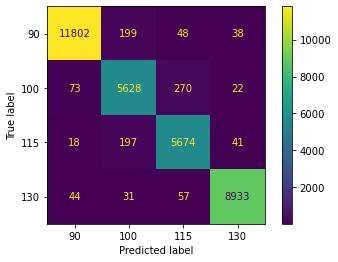

{'90': {'precision': 0.9886906257853733, 'recall': 0.9764209481260859, 'f1-score': 0.9825174825174826, 'support': 12087}, '100': {'precision': 0.9294797687861271, 'recall': 0.9390956115468047, 'f1-score': 0.9342629482071714, 'support': 5993}, '115': {'precision': 0.9380062820300876, 'recall': 0.9568296795952782, 'f1-score': 0.9473244845145672, 'support': 5930}, '130': {'precision': 0.9888200132831525, 'recall': 0.985438499724214, 'f1-score': 0.9871263605724072, 'support': 9065}, 'accuracy': 0.9686167800453515, 'macro avg': {'precision': 0.961249172471185, 'recall': 0.9644461847480956, 'f1-score': 0.962807818952907, 'support': 33075}, 'weighted avg': {'precision': 0.9689102500696375, 'recall': 0.9686167800453515, 'f1-score': 0.9687274772956808, 'support': 33075}}


In [91]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_RF,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [92]:
precision_RF = classification_report(y_test, y_pred, output_dict= True)["90"]["precision"]
print(precision_RF)
accuracy_RF =  accuracy_score(y_test, y_pred)
print(accuracy_RF)

0.9886906257853733
0.9686167800453515


### Cross Validation

In [ ]:
scores=cross_validate(clf_RF, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_RF_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_RF_cv)
precision_RF_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_RF_cv)

In [93]:
Final_accuracy=[accuracy_KNC ,accuracy_XG, accuracy_SVC, accuracy_DT,accuracy_RF]
Final_precision=[precision_KNC,precision_XG,precision_SVC,precision_DT,precision_RF]

In [94]:
report_accuracy = pd.DataFrame(Final_accuracy, columns=["Accuracy"])
report_precision= pd.DataFrame(Final_precision, columns=["Precision"])

In [95]:
report = pd.concat([report_accuracy,report_precision], axis=1)
report.set_axis(["KNN", "XG Boost", "SVC", "Decision Tree", "Random Forest"])

,Accuracy,Precision
KNN,0.905397,0.924726
XG Boost,0.971822,0.989623
SVC,0.801270,0.784821
Decision Tree,0.942434,0.964212
Random Forest,0.968617,0.988691


In [96]:
print("Best Accuracy for Cooler Condition by XG Boost ", max(report.Accuracy))

Best Accuracy for Cooler Condition by XG Boost  0.9718216175359032


## 4.E. Stable Flag

### Data Preprocessing 

In [97]:
X=data.iloc[:,:-5].values
y=data.iloc[:,-1].values

In [98]:
# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling 

In [99]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1. K-Neighbor Classification

In [100]:
clf_knc=KNeighborsClassifier(n_jobs=-1)
clf_knc.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [101]:
y_pred= clf_knc.predict(X_test)

[[21354   289]
 [ 1285 10147]]


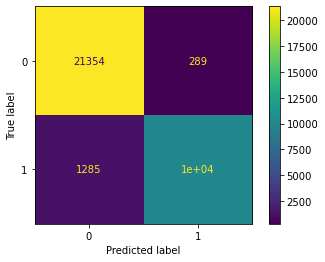

{'0': {'precision': 0.9432395423826141, 'recall': 0.9866469528253939, 'f1-score': 0.9644550833295695, 'support': 21643}, '1': {'precision': 0.9723073974702952, 'recall': 0.8875962211336599, 'f1-score': 0.9280226815438083, 'support': 11432}, 'accuracy': 0.952411186696901, 'macro avg': {'precision': 0.9577734699264546, 'recall': 0.9371215869795269, 'f1-score': 0.946238882436689, 'support': 33075}, 'weighted avg': {'precision': 0.9532865180247114, 'recall': 0.952411186696901, 'f1-score': 0.9518626353412151, 'support': 33075}}


In [102]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_knc,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [103]:
precision_KNC = classification_report(y_test, y_pred, output_dict= True)["1"]["precision"]
print(precision_KNC)
accuracy_KNC =  accuracy_score(y_test, y_pred)
print(accuracy_KNC)

0.9723073974702952
0.952411186696901


### Cross Validation

In [104]:
scores=cross_validate(clf_knc,X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.82980919, 0.8617003 , 0.83673072, 0.84576535, 0.80285287,
        0.7859304 , 0.84474349, 0.8257916 , 0.82878494, 0.78689694]),
 'score_time': array([2.3118391 , 1.18507552, 1.16667819, 1.1880784 , 1.31628275,
        1.24678516, 1.27371979, 1.27733207, 1.18019271, 1.16807699]),
 'test_accuracy': array([0.94920891, 0.95082132, 0.9488058 , 0.94941046, 0.95374383,
        0.94920379, 0.94960693, 0.94940536, 0.95263052, 0.95111873]),
 'test_precision_weighted': array([0.95032829, 0.95176145, 0.9495958 , 0.95053594, 0.95459911,
        0.95017832, 0.95065444, 0.95040592, 0.95342921, 0.95183432])}

In [105]:
accuracy_knc_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_knc_cv)
precision_knc_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_knc_cv)

Accuracy Score is 0.950395565507705
Precision Score is 0.9513322795867012


### 2.  XG Boost

In [106]:
clf_xg = XGBClassifier(n_jobs= -1)
clf_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
y_pred = clf_xg.predict(X_test)

[[21500   143]
 [  701 10731]]


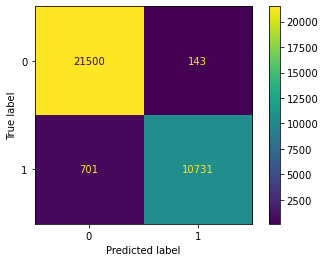

{'0': {'precision': 0.96842484572767, 'recall': 0.9933927828859216, 'f1-score': 0.9807499315755862, 'support': 21643}, '1': {'precision': 0.9868493654588928, 'recall': 0.9386808957312807, 'f1-score': 0.962162646821483, 'support': 11432}, 'accuracy': 0.9744822373393802, 'macro avg': {'precision': 0.9776371055932813, 'recall': 0.9660368393086012, 'f1-score': 0.9714562891985346, 'support': 33075}, 'weighted avg': {'precision': 0.9747930727743015, 'recall': 0.9744822373393802, 'f1-score': 0.974325446638053, 'support': 33075}}


In [108]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_xg,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [109]:
precision_XG = classification_report(y_test, y_pred, output_dict= True)["1"]["precision"]
print(precision_XG)
accuracy_XG =  accuracy_score(y_test, y_pred)
print(accuracy_XG)

0.9868493654588928
0.9744822373393802


### Cross Validation

In [ ]:
scores=cross_validate(clf_xg, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_xg_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_xg_cv)
precision_xg_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_xg_cv)

### 3. SVC 

In [110]:
clf_svc = SVC(kernel= "rbf", random_state = 0)
clf_svc.fit(X_train, y_train)

SVC(random_state=0)

In [111]:
y_pred = clf_svc.predict(X_test)

[[21533   110]
 [ 2273  9159]]


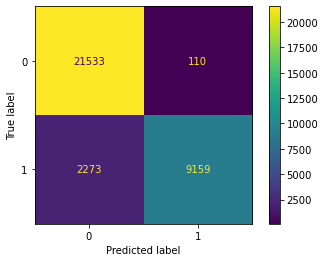

{'0': {'precision': 0.9045198689406032, 'recall': 0.9949175252968627, 'f1-score': 0.9475676032475961, 'support': 21643}, '1': {'precision': 0.9881324846261733, 'recall': 0.8011721483554933, 'f1-score': 0.8848847881744843, 'support': 11432}, 'accuracy': 0.9279516250944823, 'macro avg': {'precision': 0.9463261767833883, 'recall': 0.898044836826178, 'f1-score': 0.9162261957110402, 'support': 33075}, 'weighted avg': {'precision': 0.9334196247234433, 'recall': 0.9279516250944823, 'f1-score': 0.9259019965381232, 'support': 33075}}


In [112]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_svc,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [113]:
precision_SVC = classification_report(y_test, y_pred, output_dict= True)["1"]["precision"]
print(precision_SVC)
accuracy_SVC =  accuracy_score(y_test, y_pred)
print(accuracy_SVC)

0.9881324846261733
0.9279516250944823


### Cross Validation

In [ ]:
scores=cross_validate(clf_svc, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_svc_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_svc_cv)
precision_svc_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_svc_cv)

### 4. Decision Tree

In [114]:
clf_DT= DecisionTreeClassifier(criterion="entropy", random_state=0)
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [115]:
y_pred= clf_DT.predict(X_test)

[[21175   468]
 [  460 10972]]


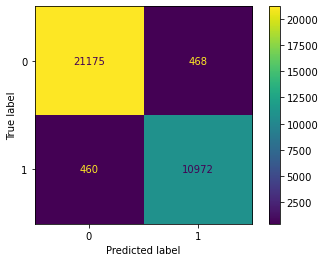

{'0': {'precision': 0.9787381557661197, 'recall': 0.978376380353925, 'f1-score': 0.9785572346226721, 'support': 21643}, '1': {'precision': 0.9590909090909091, 'recall': 0.9597620713785864, 'f1-score': 0.9594263728576424, 'support': 11432}, 'accuracy': 0.9719425547996977, 'macro avg': {'precision': 0.9689145324285144, 'recall': 0.9690692258662557, 'f1-score': 0.9689918037401573, 'support': 33075}, 'weighted avg': {'precision': 0.9719473069682056, 'recall': 0.9719425547996977, 'f1-score': 0.9719448684337736, 'support': 33075}}


In [116]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_DT,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [117]:
precision_DT = classification_report(y_test, y_pred, output_dict= True)["1"]["precision"]
print(precision_DT)
accuracy_DT =  accuracy_score(y_test, y_pred)
print(accuracy_DT)

0.9590909090909091
0.9719425547996977


### Cross Validation

In [ ]:
scores=cross_validate(clf_DT, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
scores=cross_validate(clf_DT, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_DT_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_DT_cv)
precision_DT_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_DT_cv)

### 5. Random Forest

In [118]:
clf_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [119]:
y_pred = clf_RF.predict(X_test)

[[21574    69]
 [  645 10787]]


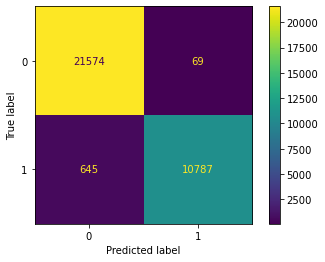

{'0': {'precision': 0.9709707907646609, 'recall': 0.9968119022316685, 'f1-score': 0.9837216725183531, 'support': 21643}, '1': {'precision': 0.9936440677966102, 'recall': 0.9435794261721484, 'f1-score': 0.967964824120603, 'support': 11432}, 'accuracy': 0.9784126984126984, 'macro avg': {'precision': 0.9823074292806355, 'recall': 0.9701956642019085, 'f1-score': 0.9758432483194781, 'support': 33075}, 'weighted avg': {'precision': 0.97880755276101, 'recall': 0.9784126984126984, 'f1-score': 0.9782754959232487, 'support': 33075}}


In [120]:
print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(clf_RF,X_test, y_test))
plt.show()
print(classification_report(y_test, y_pred, output_dict= True))

In [121]:
precision_RF = classification_report(y_test, y_pred, output_dict= True)["1"]["precision"]
print(precision_RF)
accuracy_RF =  accuracy_score(y_test, y_pred)
print(accuracy_RF)

0.9936440677966102
0.9784126984126984


### Cross Validation

In [ ]:
scores=cross_validate(clf_RF, X_train,y_train,scoring=["accuracy","precision_weighted"],cv=10)

accuracy_RF_cv= scores["test_accuracy"].mean()
print("Accuracy Score is", accuracy_RF_cv)
precision_RF_cv= scores["test_precision_weighted"].mean()
print("Precision Score is", precision_RF_cv)

In [122]:
Final_accuracy=[accuracy_KNC ,accuracy_XG, accuracy_SVC, accuracy_DT,accuracy_RF]
Final_precision=[precision_KNC,precision_XG,precision_SVC,precision_DT,precision_RF]

In [123]:
report_accuracy = pd.DataFrame(Final_accuracy, columns=["Accuracy"])
report_precision= pd.DataFrame(Final_precision, columns=["Precision"])

In [124]:
report = pd.concat([report_accuracy,report_precision], axis=1)
report.set_axis(["KNN", "XG Boost", "SVC", "Decision Tree", "Random Forest"])

,Accuracy,Precision
KNN,0.952411,0.972307
XG Boost,0.974482,0.986849
SVC,0.927952,0.988132
Decision Tree,0.971943,0.959091
Random Forest,0.978413,0.993644


In [125]:
print("Best Accuracy for Stable Flag by Decision Tree ", max(report.Accuracy))

Best Accuracy for Stable Flag by Decision Tree  0.9784126984126984


In [18]:
class Multiclass_Classification_Models:
    def __init__(self,X_train,y_train,X_test,y_test):
        self.X_train=X_train
        self.X_test=X_test
        self.y_train=y_train
        self.y_test=y_test
    
    def knearestneighbors(self):
        global accuracy_score_knc, precision_score_knc, recall_score_knc
        clf_knc= KNeighborsClassifier(n_jobs=-1)
        clf_knc.fit(self.X_train,self.y_train)
        y_pred=clf_knc.predict(self.X_test)
        
        # accuracy_score
        accuracy_score_knc = accuracy_score(self.y_test,y_pred)
        print("accuracy_score_knc= ",accuracy_score_knc)
        
        # precision-score
        precision_score_knc = precision_score(self.y_test,y_pred,average="weighted")
        print("precision_score_knc= ", precision_score_knc) 
        
        # recall-score
        recall_score_knc = recall_score(self.y_test,y_pred,average="weighted")
        print("recall_score_knc = ",recall_score_knc)
        
        # cross-validate
        scores=cross_validate(clf_knc,self.X_train,self.y_train,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_knc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_knc_cross= ",accuracy_score_knc_cross)
        precision_score_knc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_knc_cross= ",precision_score_knc_cross)
        recall_score_knc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_knc_cross= ",recall_score_knc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.y_test,y_pred),annot=True)
    
    def xgboost(self):
        global accuracy_score_xg, precision_score_xg, recall_score_xg
        clf_xg= XGBClassifier(n_jobs=-1)
        clf_xg.fit(self.X_train,self.y_train)
        y_pred=clf_xg.predict(self.X_test)
        
        # accuracy_score
        accuracy_score_xg = accuracy_score(self.y_test,y_pred)
        print("accuracy_score_xg= ",accuracy_score_xg)
        
        # precision-score
        precision_score_xg = precision_score(self.y_test,y_pred,average="weighted")
        print("precision_score_xg= ", precision_score_xg) 
        
        # recall-score
        recall_score_xg = recall_score(self.y_test,y_pred,average="weighted")
        print("recall_score_xg = ",recall_score_xg)
        
        # cross-validate
        scores=cross_validate(clf_xg,self.X_train,self.y_train,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_xg_cross=scores["test_accuracy"].mean()
        print("accuracy_score_xg_cross= ",accuracy_score_xg_cross)
        precision_score_xg_cross=scores["test_precision_weighted"].mean()
        print("precision_score_xg_cross= ",precision_score_xg_cross)
        recall_score_xg_cross=scores["test_recall_weighted"].mean()
        print("recall_score_xg_cross= ",recall_score_xg_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.y_test,y_pred),annot=True)
        
    def Svc(self):
        global accuracy_score_svc, precision_score_svc, recall_score_svc
        clf_svc = SVC(kernel="rbf")
        clf_svc.fit(self.X_train,self.y_train)
        y_pred=clf_svc.predict(self.X_test)
        
        # accuracy_score
        accuracy_score_svc = accuracy_score(self.y_test,y_pred)
        print("accuracy_score_svc = ",accuracy_score_svc)
        
        # precision-score
        precision_score_svc =precision_score(self.y_test,y_pred,average="weighted")
        print("precision_score_svc= ",precision_score_svc) 
        
        # recall-score
        recall_score_svc = recall_score(self.y_test,y_pred,average="weighted")
        print("recall_score_svc= ",recall_score_svc)
         
        # cross-validate
        scores=cross_validate(clf_svc,self.X_train,self.y_train,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_svc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
        precision_score_svc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_svc_cross= ",precision_score_svc_cross)
        recall_score_svc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_svc_cross= ",recall_score_svc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.y_test,y_pred),annot=True)
        
            
    def decision_tree(self):
        global accuracy_score_dt, precision_score_dt, recall_score_dt
        clf_dt=DecisionTreeClassifier(criterion="entropy",random_state=42)
        clf_dt.fit(X_train,y_train)
        y_pred=clf_dt.predict(self.X_test)
        
        # accuracy_score
        accuracy_score_dt=accuracy_score(self.y_test,y_pred)
        print("accuracy_score_dt= ", accuracy_score_dt)
        
        # precision-score
        precision_score_dt=precision_score(self.y_test,y_pred,average="weighted")
        print("precision_score_dt= ", precision_score_dt)
        
        # recall-score
        recall_score_dt=recall_score(self.y_test,y_pred,average="weighted")
        print("recall_score_dt=",recall_score_dt)
        
        # cross-validate
        scores=cross_validate(clf_dt,self.X_train,self.y_train,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_dt_cross=scores["test_accuracy"].mean()
        print("accuracy_score_dt_cross= ",accuracy_score_dt_cross)
        precision_score_dt_cross=scores["test_precision_weighted"].mean()
        print("precision_score_dt_cross= ",precision_score_dt_cross)
        recall_score_dt_cross=scores["test_recall_weighted"].mean()
        print("recall_score_dt_cross= ",recall_score_dt_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.y_test,y_pred),annot=True)      
        
        
    def random_forest(self):
        global accuracy_score_rf, precision_score_rf, recall_score_rf
        clf_rf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
        clf_rf.fit(X_train,y_train)
        y_pred=clf_rf.predict(self.X_test)
        
        # accuracy_score
        accuracy_score_rf=accuracy_score(self.y_test,y_pred)
        print("accuracy_score_rf= ",accuracy_score_rf)
        
        # precision-score
        precision_score_rf = precision_score(self.y_test,y_pred,average="weighted")
        print("precision_score_rf = ",precision_score_rf)
        
        # recall-score
        recall_score_rf  = recall_score(self.y_test,y_pred,average="weighted")
        print("recall_score_rf= ",recall_score_rf)
        
        # cross-validate
        scores=cross_validate(clf_rf,self.X_train,self.y_train,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_rf_cross=scores["test_accuracy"].mean()
        print("accuracy_score_rf_cross= ",accuracy_score_rf_cross)
        precision_score_rf_cross=scores["test_precision_weighted"].mean()
        print("precision_score_rf_cross= ",precision_score_rf_cross)
        recall_score_rf_cross=scores["test_recall_weighted"].mean()
        print("recall_score_rf_cross= ",recall_score_rf_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.y_test,y_pred),annot=True)
        
    
    def best_model(self):
        Final_accuracy=[accuracy_score_knc ,accuracy_score_xg, accuracy_score_svc, accuracy_score_dt,accuracy_score_rf]
        Final_precision=[precision_score_knc ,precision_score_xg, precision_score_svc, precision_score_dt,precision_score_rf]
        Final_recall=[recall_score_knc ,recall_score_xg, recall_score_svc, recall_score_dt, recall_score_rf]
        
        report_accuracy = pd.DataFrame(Final_accuracy, columns=["Accuracy"])
        report_precision= pd.DataFrame(Final_precision, columns=["Precision"])
        report_recall= pd.DataFrame(Final_recall, columns=["recall"])
            
        report = pd.concat([report_accuracy,report_precision, report_recall], axis=1)
        report.set_axis(["KNN", "XG Boost", "SVC", "Decision Tree", "Random Forest"], inplace= True)
        
        
        return report

## 5. Failure Predictions before 15 minutes

### 5.A Cooler Condition

In [30]:
X=data.iloc[:-14,:-5].values
y=data.iloc[14:,-5].values

# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
models_cooler_cond_15 = Multiclass_Classification_Models(X_train,y_train,X_test,y_test)

accuracy_score_knc=  0.9993045476536042
precision_score_knc=  0.9993046512013416
recall_score_knc =  0.9993045476536042
accuracy_score_knc_cross=  0.999354928120826
precision_score_knc_cross=  0.9993550530619736
recall_score_knc_cross=  0.999354928120826

confusion_matrix:-


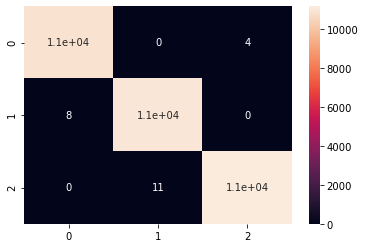

In [32]:
models_cooler_cond_15.knearestneighbors()

accuracy_score_xg=  0.9997278664731495
precision_score_xg=  0.9997279569803365
recall_score_xg =  0.9997278664731495
accuracy_score_xg_cross=  0.9997480184162401
precision_score_xg_cross=  0.9997480704382037
recall_score_xg_cross=  0.9997480184162401

confusion_matrix:-


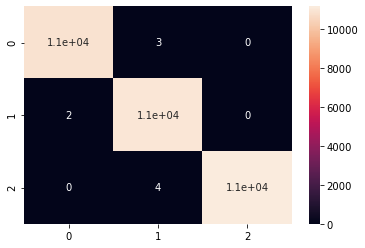

In [33]:
models_cooler_cond_15.xgboost()

accuracy_score_svc =  0.9990626511852927
precision_score_svc=  0.9990626892025771
recall_score_svc=  0.9990626511852927
accuracy_score_svc_cross=  0.9991331854242753
precision_score_svc_cross=  0.9991333558957118
recall_score_svc_cross=  0.9991331854242753

confusion_matrix:-


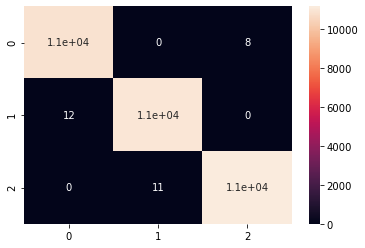

In [34]:
models_cooler_cond_15.Svc()

accuracy_score_dt=  0.9998488147073052
precision_score_dt=  0.9998488229440415
recall_score_dt= 0.9998488147073052
accuracy_score_dt_cross=  0.9996875447053697
precision_score_dt_cross=  0.9996875995725792
recall_score_dt_cross=  0.9996875447053697

confusion_matrix:-


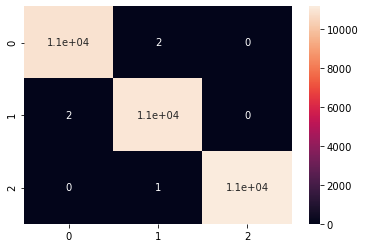

In [35]:
models_cooler_cond_15.decision_tree()

accuracy_score_rf=  0.9996069182389937
precision_score_rf =  0.9996071353049834
recall_score_rf=  0.9996069182389937
accuracy_score_rf_cross=  0.9997177825766915
precision_score_rf_cross=  0.9997179385325061
recall_score_rf_cross=  0.9997177825766915

confusion_matrix:-


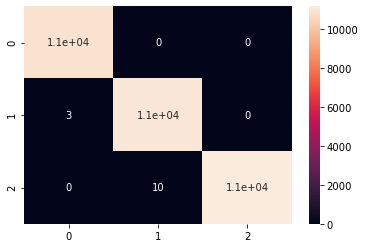

In [36]:
models_cooler_cond_15.random_forest()

In [37]:
models_cooler_cond_15.best_model()

,Accuracy,Precision,recall
KNN,0.999305,0.999305,0.999305
XG Boost,0.999728,0.999728,0.999728
SVC,0.999063,0.999063,0.999063
Decision Tree,0.999849,0.999849,0.999849
Random Forest,0.999607,0.999607,0.999607


In [46]:
print("Best Model for Cooler Condition is Decision Tree & its Accuracy is", max(models_stable_flag_15.best_model().Accuracy))

Best Model for Cooler Condition is Decision D & its Accuracy is 0.9042392356071601


### 5.b Valve Condition

In [38]:
X=data.iloc[:-14,:-5].values
y=data.iloc[14:,-4].values

# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
models_valve_cond_15 = Multiclass_Classification_Models(X_train,y_train,X_test,y_test)

accuracy_score_knc=  0.6777939042089985
precision_score_knc=  0.6880929767096629
recall_score_knc =  0.6777939042089985
accuracy_score_knc_cross=  0.6682323189317356
precision_score_knc_cross=  0.6798505797909583
recall_score_knc_cross=  0.6682323189317356

confusion_matrix:-


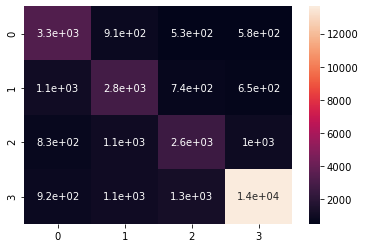

In [40]:
models_valve_cond_15.knearestneighbors()

accuracy_score_xg=  0.8245645863570392
precision_score_xg=  0.8208833301507413
recall_score_xg =  0.8245645863570392
accuracy_score_xg_cross=  0.8239764589765294
precision_score_xg_cross=  0.8199766883972279
recall_score_xg_cross=  0.8239764589765294

confusion_matrix:-


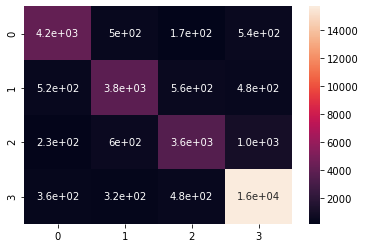

In [41]:
models_valve_cond_15.xgboost()

accuracy_score_svc =  0.5218613933236574
precision_score_svc=  0.5732733971095626
recall_score_svc=  0.5218613933236574
accuracy_score_svc_cross=  0.5192109917897856
precision_score_svc_cross=  0.5364777666068175
recall_score_svc_cross=  0.5192109917897856

confusion_matrix:-


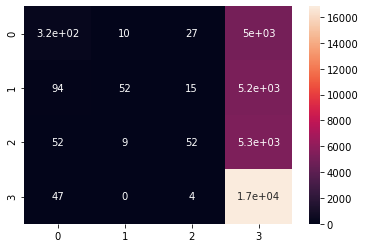

In [42]:
models_valve_cond_15.Svc()-

accuracy_score_dt=  0.8436744073536526
precision_score_dt=  0.8438605333360562
recall_score_dt= 0.8436744073536526
accuracy_score_dt_cross=  0.8372910841444631
precision_score_dt_cross=  0.8371819413230079
recall_score_dt_cross=  0.8372910841444631

confusion_matrix:-


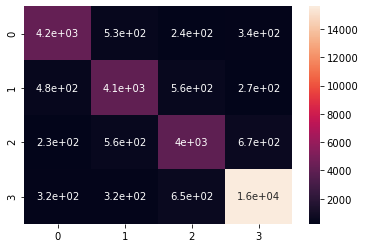

In [43]:
models_valve_cond_15.decision_tree()

accuracy_score_rf=  0.9042392356071601
precision_score_rf =  0.9037047890254845
recall_score_rf=  0.9042392356071601
accuracy_score_rf_cross=  0.9000443190785923
precision_score_rf_cross=  0.8992811514086899
recall_score_rf_cross=  0.9000443190785923

confusion_matrix:-


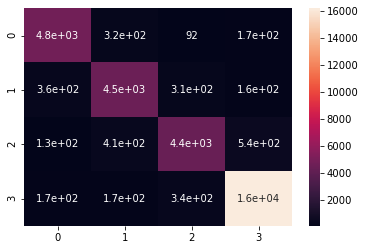

In [44]:
models_valve_cond_15.random_forest()

In [47]:
models_valve_cond_15.best_model()

,Accuracy,Precision,recall
KNN,0.677794,0.688093,0.677794
XG Boost,0.824565,0.820883,0.824565
SVC,0.521861,0.573273,0.521861
Decision Tree,0.843674,0.843861,0.843674
Random Forest,0.904239,0.903705,0.904239


In [48]:
print("Best Model for Valve Condition is Random Forest & its Accuracy is", max(models_stable_flag_15.best_model().Accuracy))

Best Model for Valve Condition is Random Forest & its Accuracy is 0.9042392356071601


### 5.C Internal Pump Leakage

In [49]:
X=data.iloc[:-14,:-5].values
y=data.iloc[14:,-3].values

# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
models_int_pump_leakage_15 = Multiclass_Classification_Models(X_train,y_train,X_test,y_test)

accuracy_score_knc=  0.9372883405902274
precision_score_knc=  0.9372878972589402
recall_score_knc =  0.9372883405902274
accuracy_score_knc_cross=  0.9362690766021535
precision_score_knc_cross=  0.9360657460069751
recall_score_knc_cross=  0.9362690766021535

confusion_matrix:-


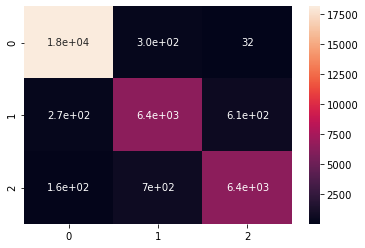

In [51]:
models_int_pump_leakage_15.knearestneighbors()

accuracy_score_xg=  0.9903543783260764
precision_score_xg=  0.9903528519467077
recall_score_xg =  0.9903543783260764
accuracy_score_xg_cross=  0.9903541627313752
precision_score_xg_cross=  0.9903525490785086
recall_score_xg_cross=  0.9903541627313752

confusion_matrix:-


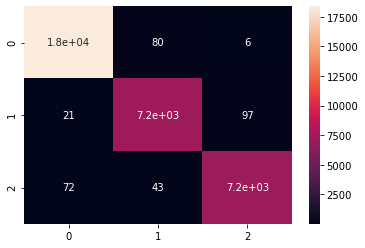

In [52]:
models_int_pump_leakage_15.xgboost()

accuracy_score_svc =  0.8162191582002902
precision_score_svc=  0.8085131159799086
recall_score_svc=  0.8162191582002902
accuracy_score_svc_cross=  0.8127380057747476
precision_score_svc_cross=  0.8042451917656749
recall_score_svc_cross=  0.8127380057747476

confusion_matrix:-


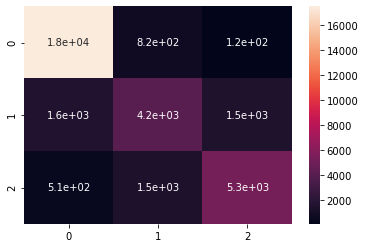

In [53]:
models_int_pump_leakage_15.Svc()

accuracy_score_dt=  0.9827044025157232
precision_score_dt=  0.9827196204511321
recall_score_dt= 0.9827044025157232
accuracy_score_dt_cross=  0.9801338384160081
precision_score_dt_cross=  0.9801334669890537
recall_score_dt_cross=  0.9801338384160081

confusion_matrix:-


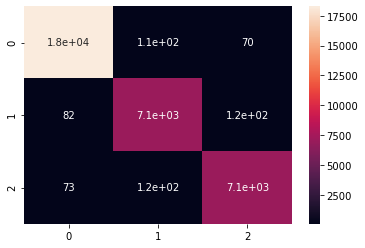

In [54]:
models_int_pump_leakage_15.decision_tree()

accuracy_score_rf=  0.9904753265602322
precision_score_rf =  0.9904678813217044
recall_score_rf=  0.9904753265602322
accuracy_score_rf_cross=  0.9905053764692695
precision_score_rf_cross=  0.9904999521780316
recall_score_rf_cross=  0.9905053764692695

confusion_matrix:-


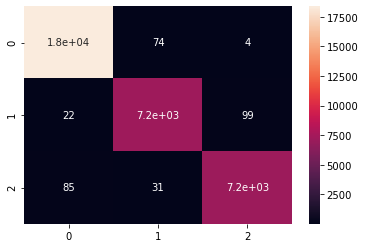

In [55]:
models_int_pump_leakage_15.random_forest()

In [56]:
models_int_pump_leakage_15.best_model()

,Accuracy,Precision,recall
KNN,0.937288,0.937288,0.937288
XG Boost,0.990354,0.990353,0.990354
SVC,0.816219,0.808513,0.816219
Decision Tree,0.982704,0.982720,0.982704
Random Forest,0.990475,0.990468,0.990475


In [ ]:
print("Best Model for Internal Pump Leakage is Random Forest & its Accuracy is", max(models_int_pump_leakage_15.best_model().Accuracy))

### 5.D Hydraulic Accumelator

In [58]:
X=data.iloc[:-14,:-5].values
y=data.iloc[14:,-2].values

# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
models_hydrau_acc_15 = Multiclass_Classification_Models(X_train,y_train,X_test,y_test)

accuracy_score_knc=  0.9064465408805031
precision_score_knc=  0.9070633579942211
recall_score_knc =  0.9064465408805031
accuracy_score_knc_cross=  0.8998427620532381
precision_score_knc_cross=  0.9003977798466887
recall_score_knc_cross=  0.8998427620532381

confusion_matrix:-


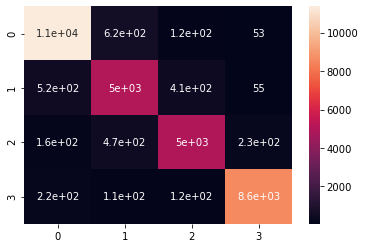

In [60]:
models_hydrau_acc_15.knearestneighbors()

accuracy_score_xg=  0.971788824383164
precision_score_xg=  0.9719929196932358
recall_score_xg =  0.971788824383164
accuracy_score_xg_cross=  0.9712036680178571
precision_score_xg_cross=  0.9714983065205312
recall_score_xg_cross=  0.9712036680178571

confusion_matrix:-


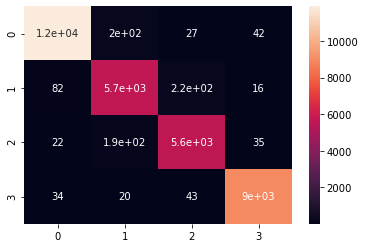

In [61]:
models_hydrau_acc_15.xgboost()

In [ ]:
models_hydrau_acc_15.Svc()

accuracy_score_svc =  0.8015541848089018
precision_score_svc=  0.8034927784215202
recall_score_svc=  0.8015541848089018


In [ ]:
models_hydrau_acc_15.decision_tree()

In [ ]:
models_hydrau_acc_15.random_forest()

In [ ]:
models_hydrau_acc_15.best_model()

In [29]:
print("Best Model for Hydraulic Accumelator is Random Forest & its Accuracy is", max(models_stable_flag_15.best_model().Accuracy))

Best Model for Stable Flag is Random Forest & its Accuracy is 0.9765058055152395


### 5.E Stable Flag with Output Features as Independent Features

In [15]:
X=data.iloc[:-14,:-5].values
y=data.iloc[14:,-1].values

# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
models_stable_flag_15 = Multiclass_Classification_Models(X_train,y_train,X_test,y_test)

accuracy_score_knc=  0.9524068698597
precision_score_knc=  0.9533357135537905
recall_score_knc =  0.9524068698597
accuracy_score_knc_cross=  0.9499163508630091
precision_score_knc_cross=  0.9507860555385053
recall_score_knc_cross=  0.9499163508630091

confusion_matrix:-


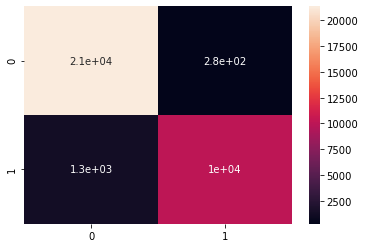

In [20]:
models_stable_flag_15.knearestneighbors()

accuracy_score_xg=  0.9740566037735849
precision_score_xg=  0.9743691189023732
recall_score_xg =  0.9740566037735849
accuracy_score_xg_cross=  0.9727256655943168
precision_score_xg_cross=  0.973071449353321
recall_score_xg_cross=  0.9727256655943168

confusion_matrix:-


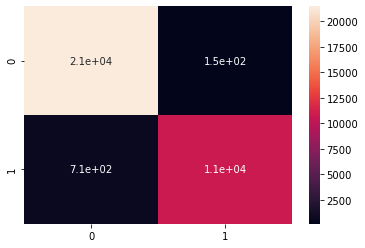

In [21]:
models_stable_flag_15.xgboost()

accuracy_score_svc =  0.927521770682148
precision_score_svc=  0.9330068802448722
recall_score_svc=  0.927521770682148
accuracy_score_svc_cross=  0.9273187733589208
precision_score_svc_cross=  0.9324551468556805
recall_score_svc_cross=  0.9273187733589208

confusion_matrix:-


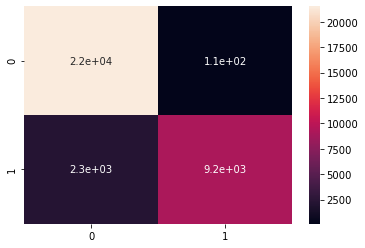

In [22]:
models_stable_flag_15.Svc()

accuracy_score_dt=  0.9681603773584906
precision_score_dt=  0.9681318147510171
recall_score_dt= 0.9681603773584906
accuracy_score_dt_cross=  0.9690467594622391
precision_score_dt_cross=  0.9690240402233193
recall_score_dt_cross=  0.9690467594622391

confusion_matrix:-


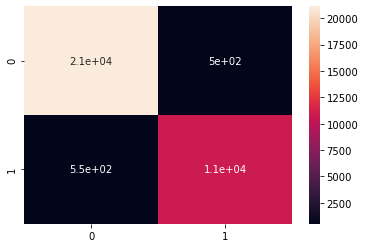

In [23]:
models_stable_flag_15.decision_tree()

accuracy_score_rf=  0.9765058055152395
precision_score_rf =  0.9769407115156225
recall_score_rf=  0.9765058055152395
accuracy_score_rf_cross=  0.9765154598368027
precision_score_rf_cross=  0.9769800250166483
recall_score_rf_cross=  0.9765154598368027

confusion_matrix:-


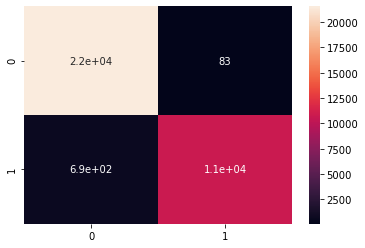

In [24]:
models_stable_flag_15.random_forest()

In [25]:
models_stable_flag_15.best_model()

,Accuracy,Precision,recall
KNN,0.952407,0.953336,0.952407
XG Boost,0.974057,0.974369,0.974057
SVC,0.927522,0.933007,0.927522
Decision Tree,0.968160,0.968132,0.968160
Random Forest,0.976506,0.976941,0.976506


In [29]:
print("Best Model for Stable Flag is Random Forest & its Accuracy is", max(models_stable_flag_15.best_model().Accuracy))

Best Model for Stable Flag is Random Forest & its Accuracy is 0.9765058055152395
